# IRAT Figures

In [4]:
# basic imports
import os 
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300

def save_fig(filename, AXIS=False):
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    if not AXIS:
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True) 
    return

In [8]:
df1 = pd.read_csv('results/irat_average_qdistances.csv')
df2 = pd.read_csv('results/irat_average_qdistances_current.csv')

# filter by positive average qdistances
df1 = df1[(df1['Avg. HA Qdistance'] > 0)]
df2 = df2[(df2['Avg. HA Qdistance'] > 0)]

## IRAT Prediction at Time of Analysis
- Uses geometric mean of HA and NA average qdistance vs IRAT score

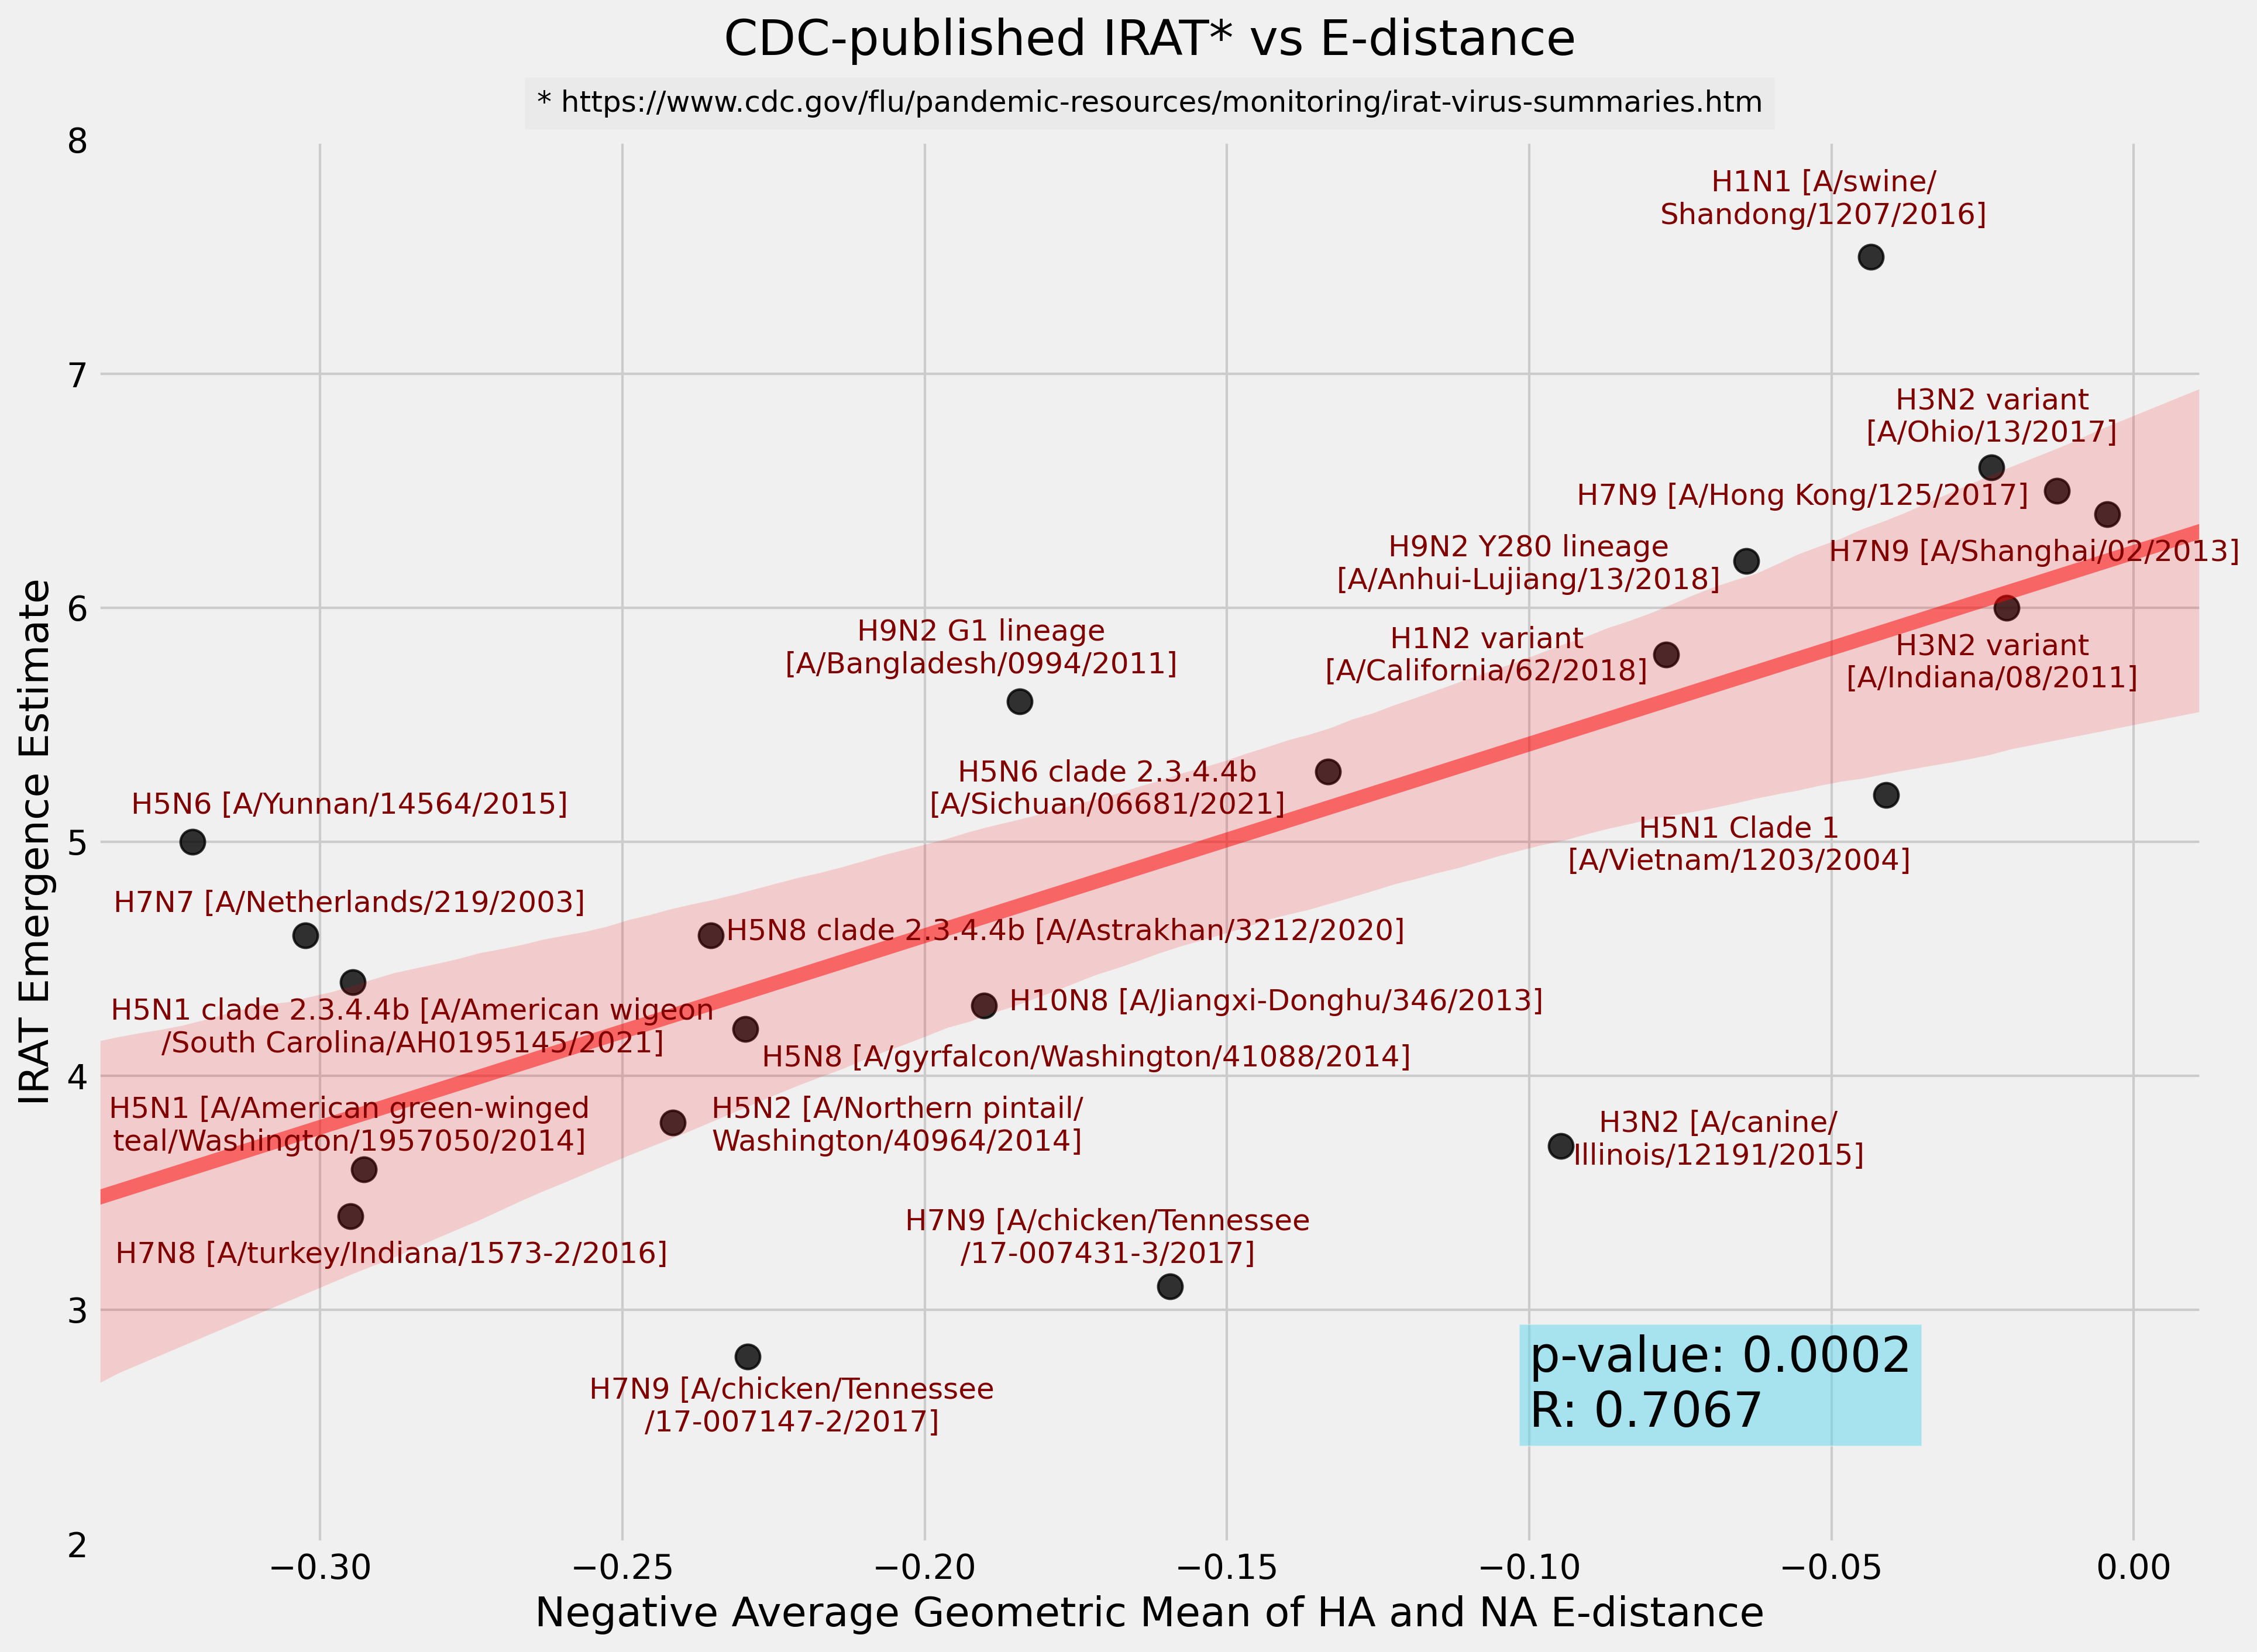

In [17]:
X = df1['Avg. Geometric Mean']
Y = df1['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['Negative Average Geometric Mean of HA and NA E-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='Negative Average Geometric Mean of HA and NA E-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs E-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.33, 0.08, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.2, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.14, 0.20, "H7N8 [A/turkey/Indiana/1573-2/2016]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.28, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.77, 0.27, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.38, 0.28, "H5N2 [A/Northern pintail/\nWashington/40964/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.47, 0.34, "H5N8 [A/gyrfalcon/Washington/41088/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.56, 0.38, "H10N8 [A/Jiangxi-Donghu/346/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.15, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.45, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.46, 0.43, "H5N8 clade 2.3.4.4b [A/Astrakhan/3212/2020]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.52, "H5N6 [A/Yunnan/14564/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.78, 0.48, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.52, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.42, 0.62, "H9N2 G1 lineage\n[A/Bangladesh/0994/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.66, 0.615, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.61, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.68, 0.68, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.92, 0.7, "H7N9 [A/Shanghai/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.81, 0.74, "H7N9 [A/Hong Kong/125/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.785, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.82, 0.94, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_enet',AXIS=True)

In [25]:
coords_df = df1[['Influenza Virus','Virus Type','Avg. Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate', ascending=False)
coords_df

,Influenza Virus,Virus Type,Avg. Geometric Mean,Potential Emergence Estimate
0,A/swine/Shandong/1207/2016,H1N1,0.043487,7.5
1,A/Ohio/13/2017,H3N2,0.023581,6.6
2,A/Hong Kong/125/2017,H7N9,0.012720,6.5
3,A/Shanghai/02/2013,H7N9,0.004411,6.4
4,A/Anhui-Lujiang/39/2018,H9N2,0.064073,6.2
5,A/Indiana/08/2011,H3N2,0.021035,6.0
6,A/California/62/2018,H1N2,0.077365,5.8
7,A/Bangladesh/0994/2011,H9N2,0.184311,5.6
8,A/Sichuan/06681/2021,H5N6,0.133250,5.3
9,A/Vietnam/1203/2004,H5N1,0.040928,5.2


## IRAT Prediction at Current Time
- Uses geometric mean of HA and NA average qdistance vs IRAT score

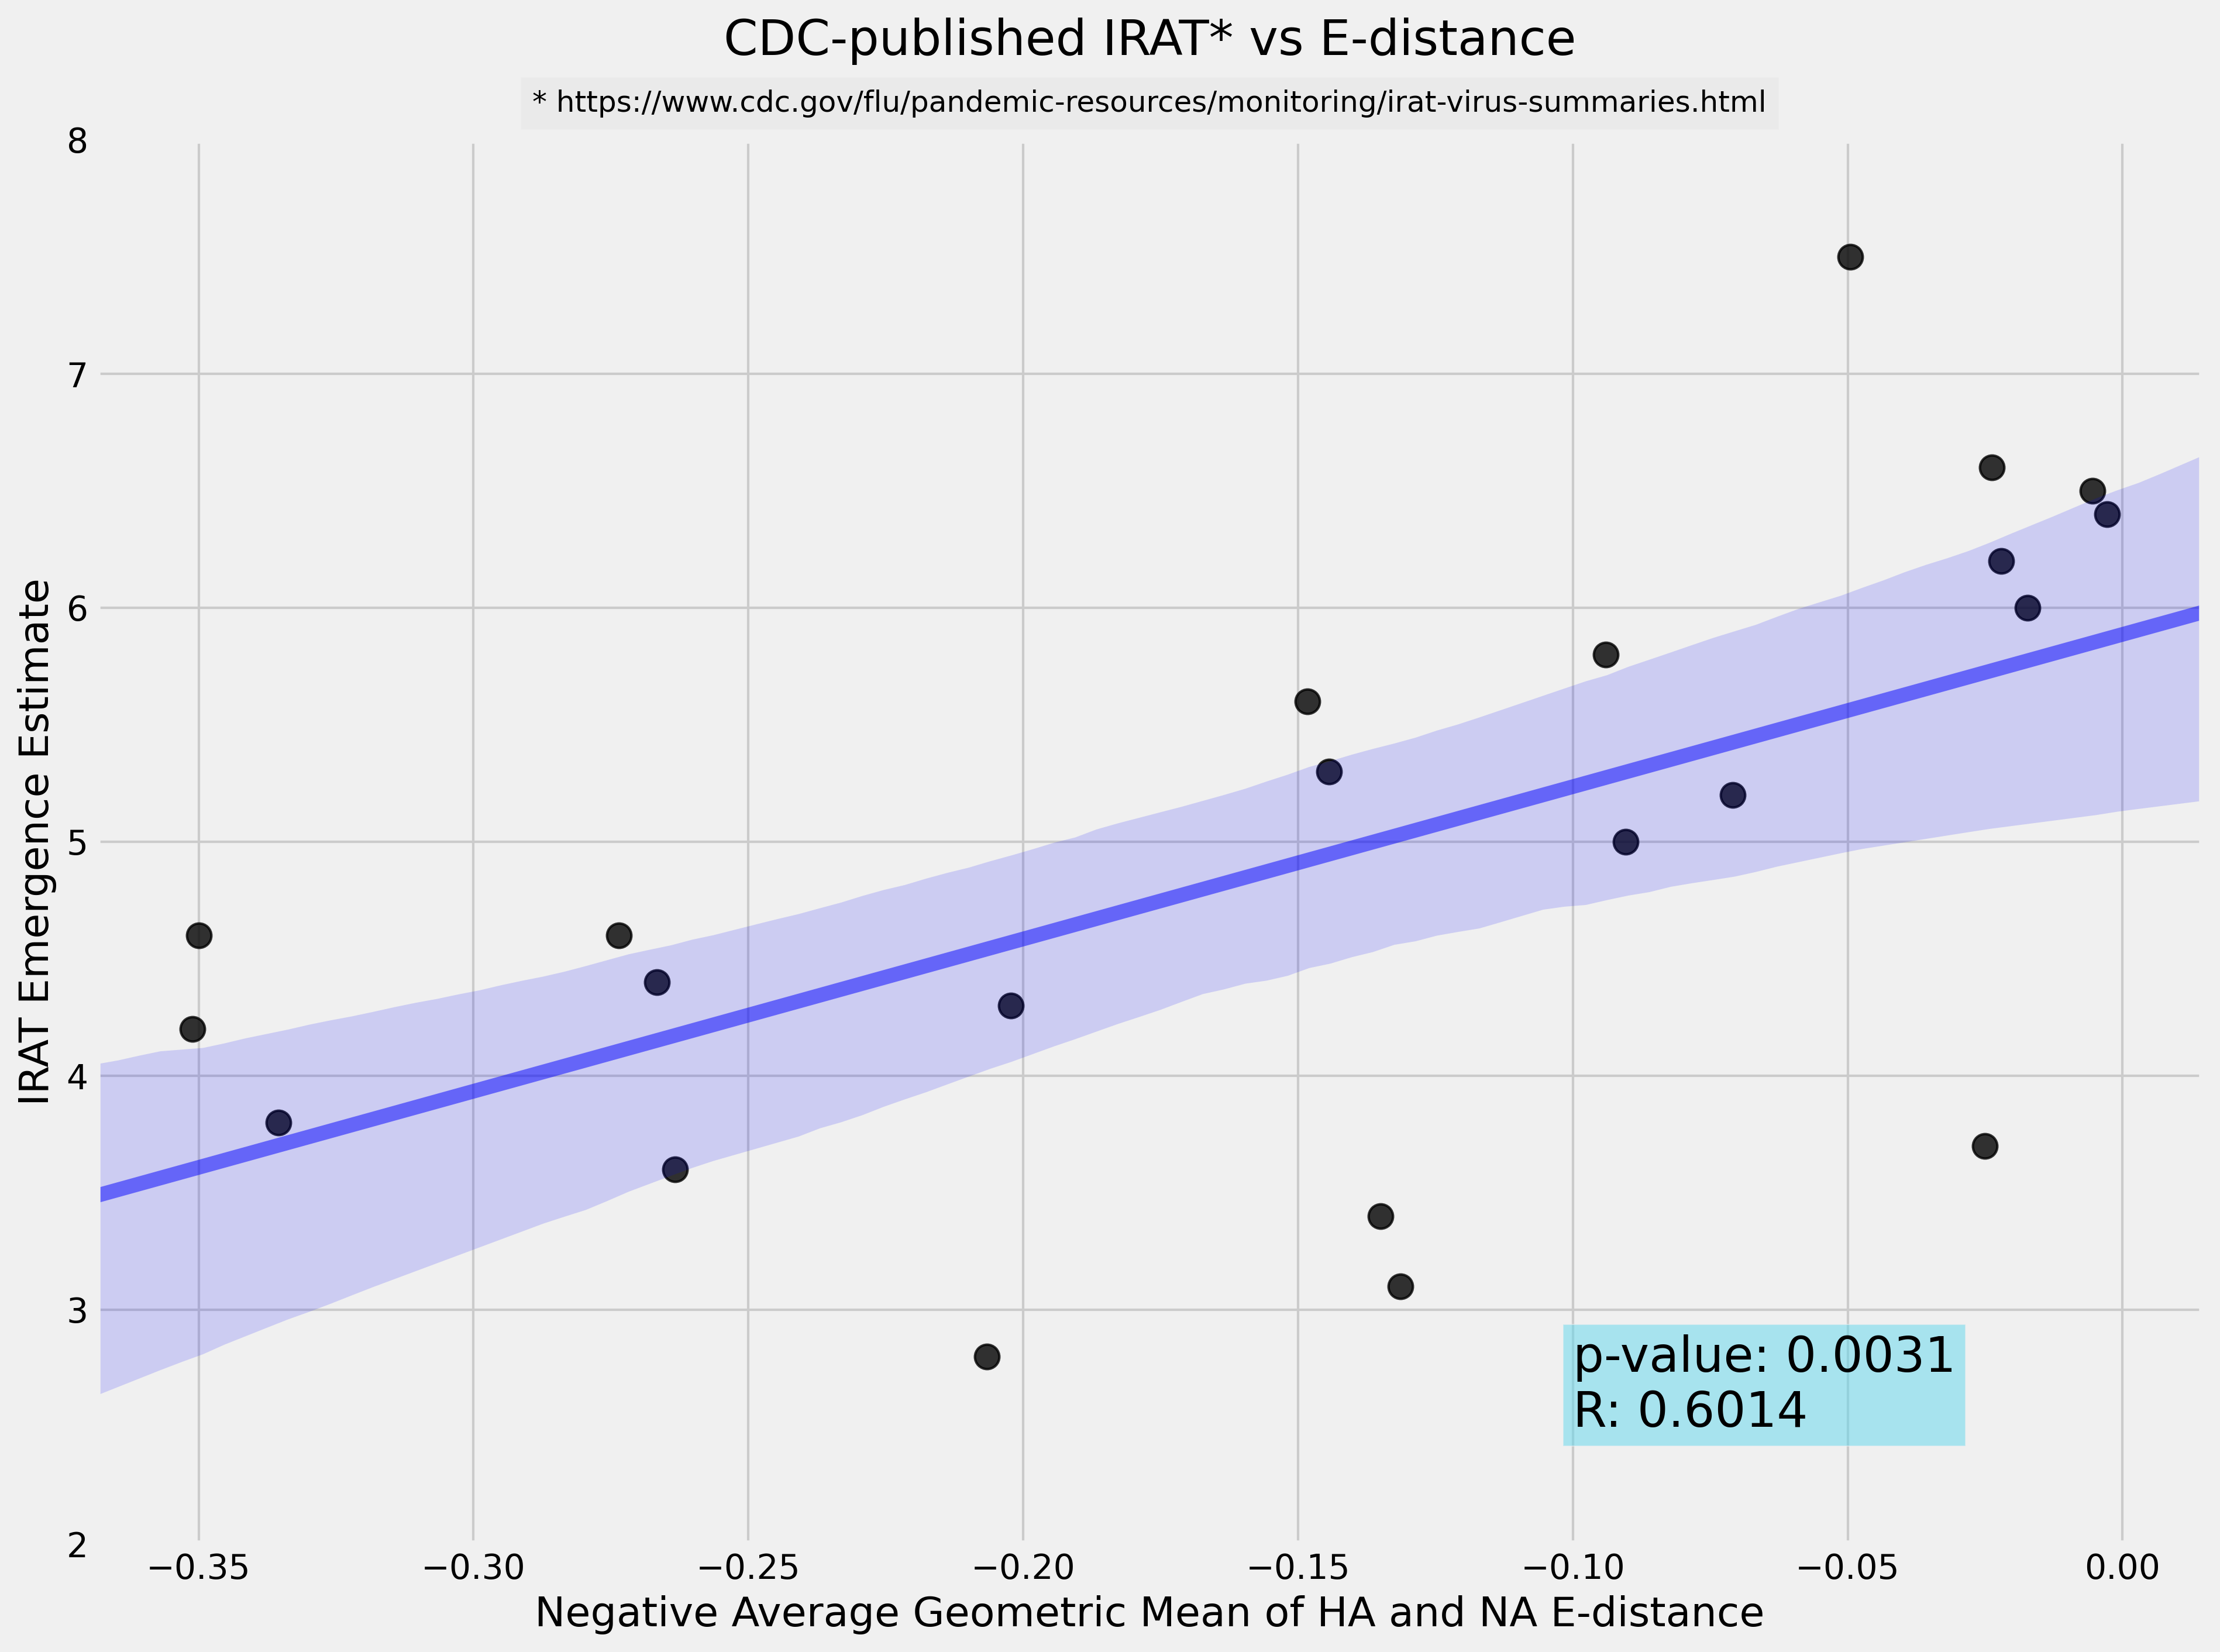

In [22]:
X = df2['Avg. Geometric Mean']
Y = df2['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['Negative Average Geometric Mean of HA and NA E-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='Negative Average Geometric Mean of HA and NA E-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs E-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

save_fig('figures/irat_enet_current',AXIS=True)

In [24]:
coords_df = df2[['Influenza Virus','Virus Type','Avg. Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate', ascending=False)
coords_df

,Influenza Virus,Virus Type,Avg. Geometric Mean,Potential Emergence Estimate
0,A/swine/Shandong/1207/2016,H1N1,0.049531,7.5
1,A/Ohio/13/2017,H3N2,0.023780,6.6
2,A/Hong Kong/125/2017,H7N9,0.005481,6.5
3,A/Shanghai/02/2013,H7N9,0.002846,6.4
4,A/Anhui-Lujiang/39/2018,H9N2,0.022034,6.2
5,A/Indiana/08/2011,H3N2,0.017326,6.0
6,A/California/62/2018,H1N2,0.094064,5.8
7,A/Bangladesh/0994/2011,H9N2,0.148334,5.6
8,A/Sichuan/06681/2021,H5N6,0.144336,5.3
9,A/Vietnam/1203/2004,H5N1,0.070949,5.2


## Comparison: Past vs Current Predictions

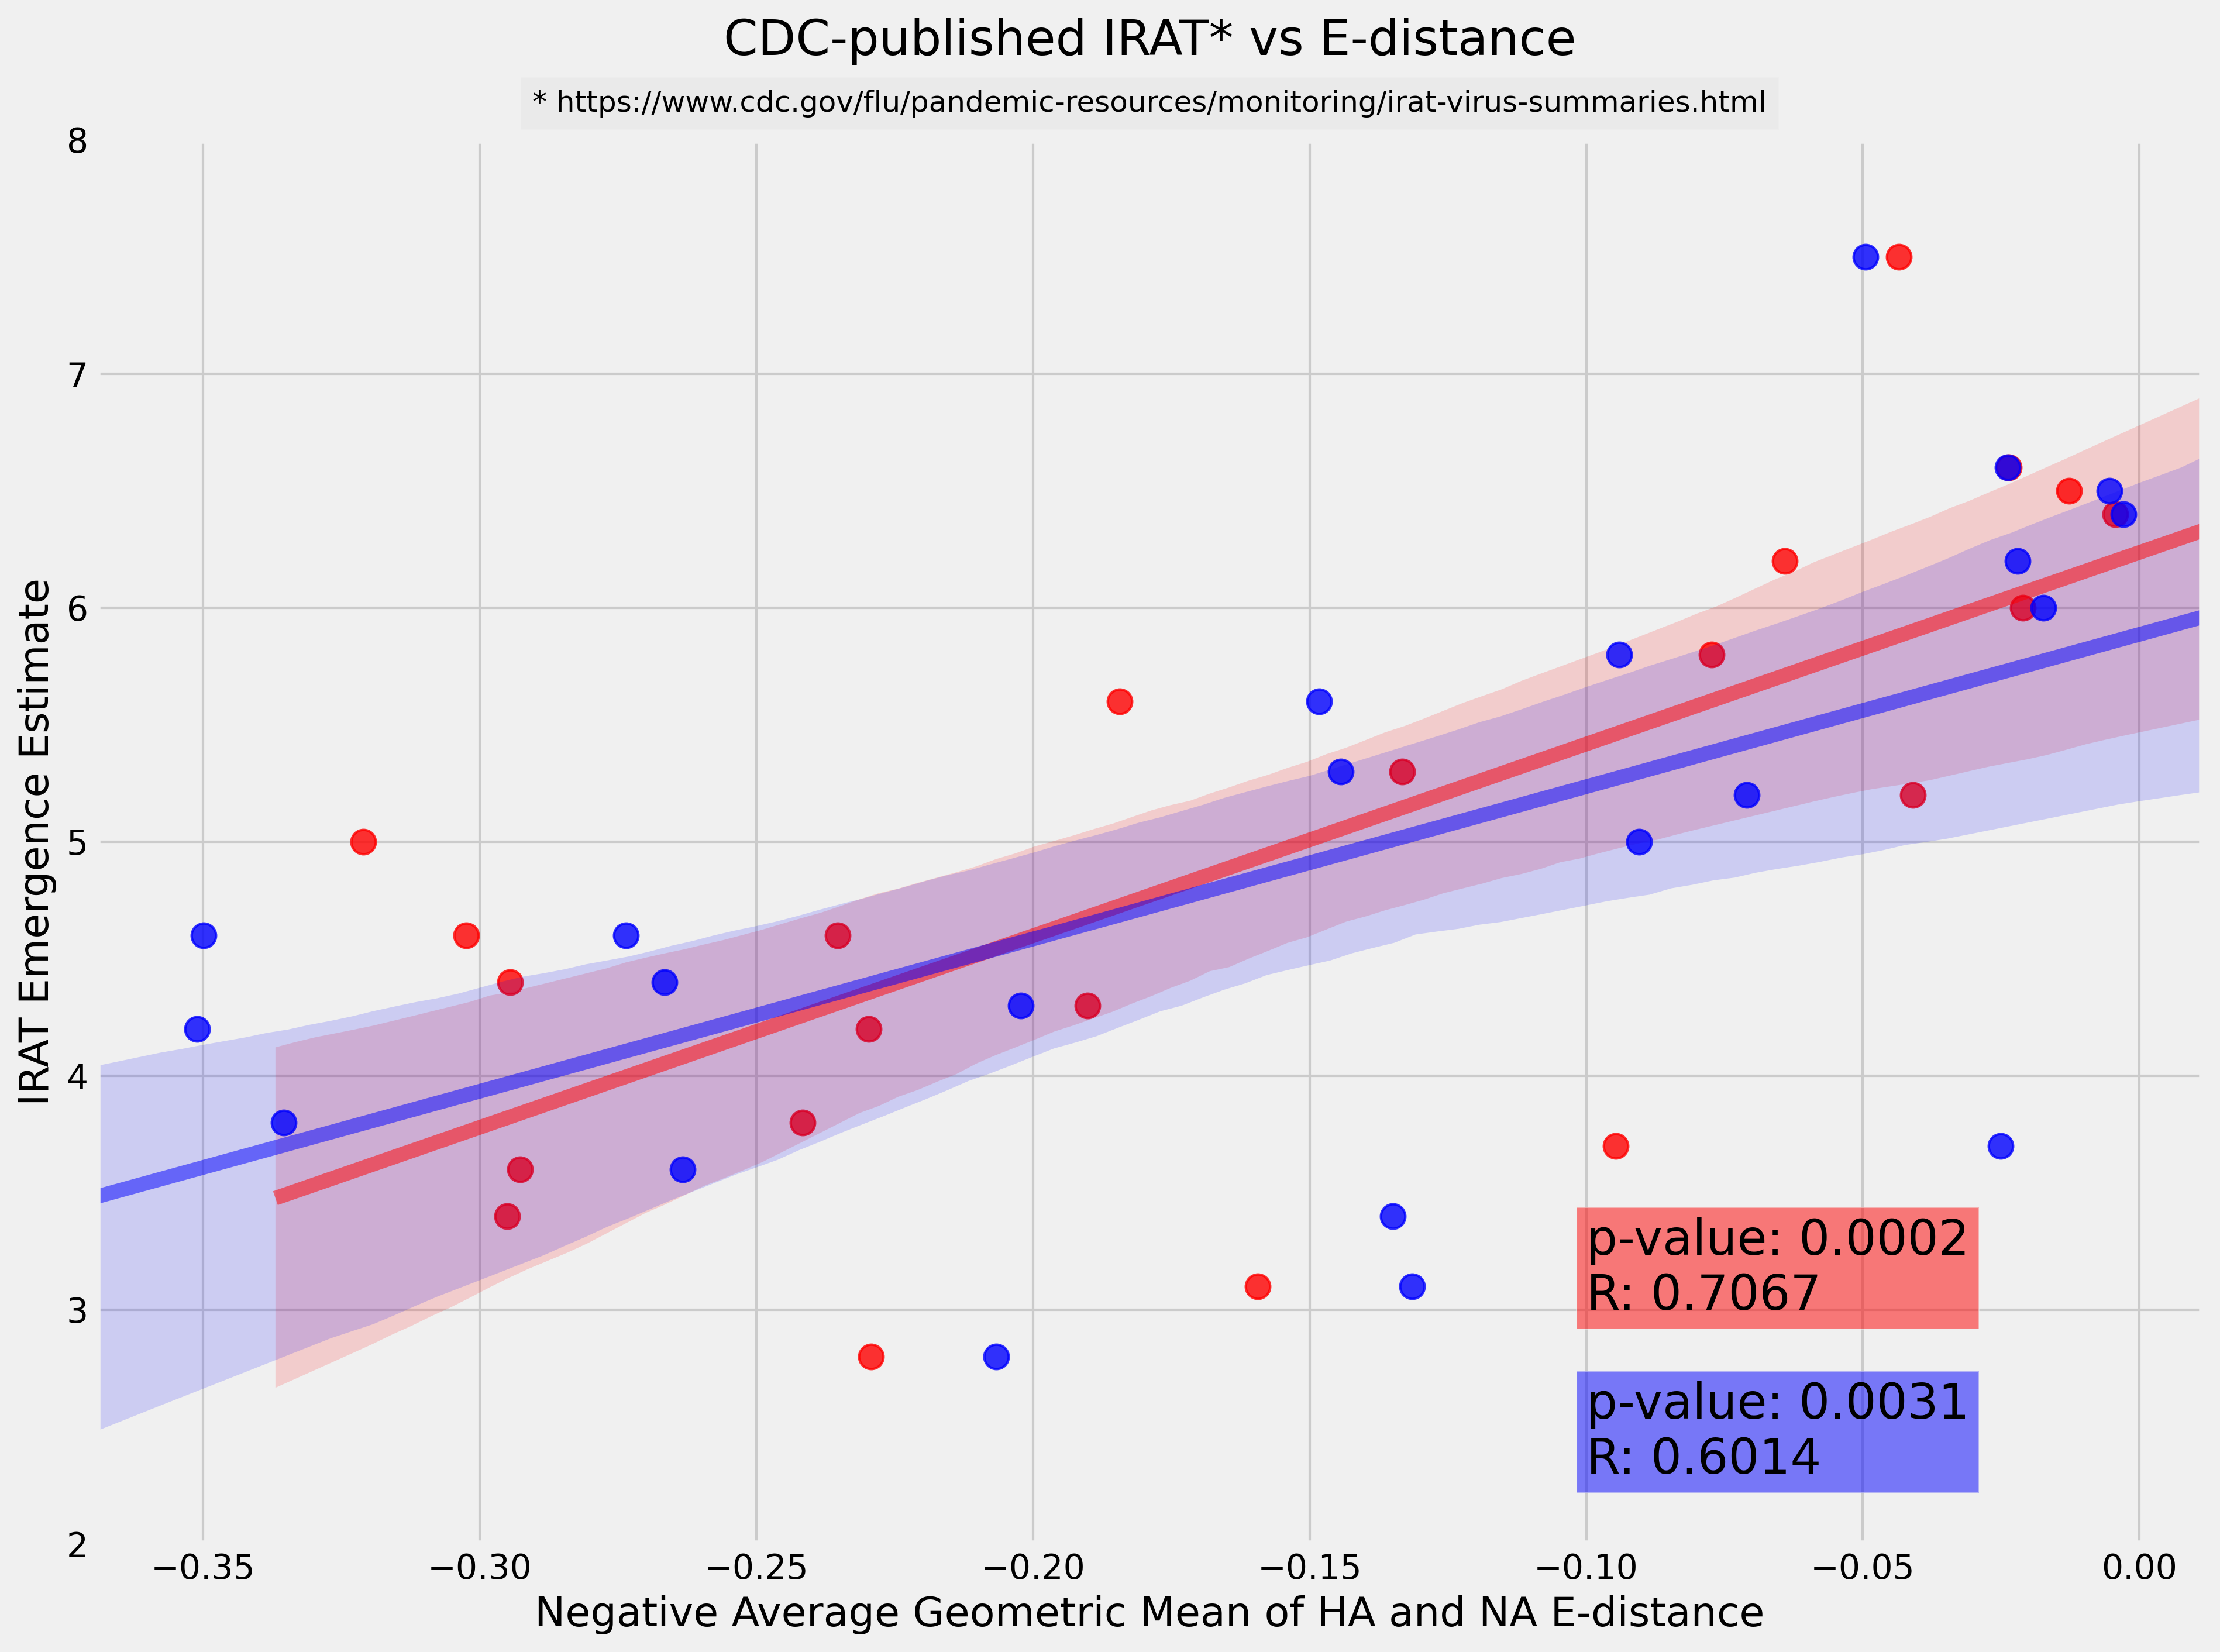

In [26]:
X1 = df1['Avg. Geometric Mean']
Y1 = df1['Potential Emergence Estimate']
X2 = df2['Avg. Geometric Mean']
Y2 = df2['Potential Emergence Estimate']

slope1, intercept1, r1, p1, std_err1 = stats.linregress(-np.array(X1), Y1)
slope2, intercept2, r2, p2, std_err2 = stats.linregress(-np.array(X2), Y2)

DF1 = pd.DataFrame([-np.array(X1), Y1]).transpose()
DF1.columns = ['Negative Average Geometric Mean of HA and NA E-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='Negative Average Geometric Mean of HA and NA E-distance', y='IRAT Emergence Estimate', data=DF1, scatter_kws={"color": "red","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 3, "p-value: {:5.4f}\nR: {:5.4f}".format(p1, r1), bbox=dict(facecolor='red', alpha=0.5), fontsize=20);

DF2 = pd.DataFrame([-np.array(X2), Y2]).transpose()
DF2.columns = ['Negative Average Geometric Mean of HA and NA E-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='Negative Average Geometric Mean of HA and NA E-distance', y='IRAT Emergence Estimate', data=DF2, scatter_kws={"color": "blue","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.1, 2.3, "p-value: {:5.4f}\nR: {:5.4f}".format(p2, r2), bbox=dict(facecolor='blue', alpha=0.5), fontsize=20);

plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs E-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

save_fig('figures/irat_enet_comparison',AXIS=True)